In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

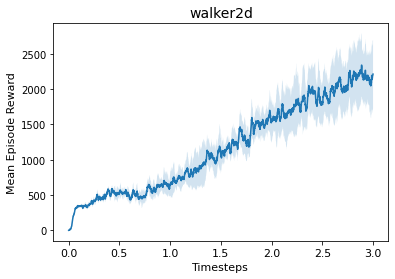

In [71]:
num_seeds = 5

logfile = 'progress.csv'

algo = 'gail'
env_name = 'Walker2d'.lower()
log_dir = './experiments/' + env_name + '/' + algo + '_paper/'
# log_name = 'MDAL_updateSteps100_tpi0.5_tc0.05_s'
log_name = 'GAIL_updateSteps10_tpi0.5_tc0.05_s'

gail = []

for seed in range(num_seeds):
    current_file = log_dir + log_name + str(seed) + '/' + logfile
    df = pd.read_csv(current_file)
    if seed == 0:
        # episodes = np.array(df['episodes'])
        steps = np.array(df['TimestepsSoFar'])

    gail.append(df['EpTrueRewMean'])

gail = np.array(gail)

gail_mean = np.mean(gail, axis=0)
std_coef = 0.87
gail_std = np.nanstd(gail, axis=0)

plt.clf()

plt.plot(steps/1e6, gail_mean)
plt.fill_between(steps/1e6, gail_mean - std_coef * gail_std, gail_mean + std_coef * gail_std, alpha=0.2)

plt.title(env_name, fontsize=14)
plt.xlabel('Timesteps', fontsize=11)
plt.ylabel("Mean Episode Reward", fontsize=11)
plt.xticks(fontsize=11)

In [70]:
env_algo = os.path.split(os.path.split(os.path.split(current_file)[0])[0])
env = os.path.split(env_algo[0])[1]
algo = env_algo[1].split("_")[0]
print(env,algo)

walker2d gail
